<a href="https://colab.research.google.com/github/kalloud/Coursera_Capstone/blob/master/Capstone%20project%3A%20exploring%20Paris%20neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyse de Paris**




In [0]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_html('https://fr.wikipedia.org/wiki/Arrondissements_de_Paris')[3]
df1=df1.drop(index=[22,21,20],axis=0)

df=pd.DataFrame(np.arange(len(df1)))
df['Nom']=df1['Nom']['Nom']
df['Superficie(ha)']=df1['Superficie(ha)']['Superficie(ha)']
df['Population']=df1['Population (municipale pour 2010 et 2015)']['2015']
df['Densité1 (hab./km²)']=df1['Densité (hab./km²)']['2015']
df=df.drop(0, axis=1)
print(df.shape)
df

(20, 4)


,Nom,Superficie(ha),Population,Densité1 (hab./km²)
0,Louvre,183,16 545,9 041
1,Bourse,99,20 796,21 006
2,Temple,117,35 049,29 956
3,Hôtel-de-Ville,160,27 146,16 966
4,Panthéon,254,59 333,23 359
5,Luxembourg,215,42 428,19 734
6,Palais-Bourbon,409,54 133,13 235
7,Élysée,388,36 694,9 457
8,Opéra[note 1],218,59 408,27 251
9,"Entrepôt, anciennement Enclos Saint-Laurent",289,91 770,31 754


In [0]:
df=df.replace('Opéra[note 1]','Opéra')
df.replace({'Opéra[note 1]':'Opéra[note 1]','Entrepôt, anciennement Enclos Saint-Laurent':'Entrepôt','Reuilly (hors bois de Vincennes)':'Reuilly','Passy (hors bois de Boulogne)':'Passy'},inplace=True)

In [4]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="IstanbulApp")

df['Coordinates']= df['Nom'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df.head()

,Nom,Superficie(ha),Population,Densité1 (hab./km²),Coordinates
0,Louvre,183,16 545,9 041,"(48.8611473, 2.33802768704666)"
1,Bourse,99,20 796,21 006,"(48.8686296, 2.3414739)"
2,Temple,117,35 049,29 956,"(31.098207, -97.3427847)"
3,Hôtel-de-Ville,160,27 146,16 966,"(43.949283050000005, 4.80525979935093)"
4,Panthéon,254,59 333,23 359,"(41.89861595, 12.476833414483862)"


In [5]:
df[['Latitude', 'Longitude']] = df['Coordinates'].apply(pd.Series)
df.drop(['Coordinates'], axis=1, inplace=True)
print(df.shape)
df.head()

(20, 6)


,Nom,Superficie(ha),Population,Densité1 (hab./km²),Latitude,Longitude
0,Louvre,183,16 545,9 041,48.861147,2.338028
1,Bourse,99,20 796,21 006,48.868630,2.341474
2,Temple,117,35 049,29 956,31.098207,-97.342785
3,Hôtel-de-Ville,160,27 146,16 966,43.949283,4.805260
4,Panthéon,254,59 333,23 359,41.898616,12.476833


In [6]:
df['Latitude'][4]
df.replace({df['Latitude'][4]:48.5959,df['Longitude'][4]:2.3464},inplace=True)
df.replace({df['Latitude'][2]:48.8462,df['Longitude'][2]:2.5810},inplace=True)
df.replace({df['Latitude'][7]:48.8704,df['Longitude'][7]:2.3168},inplace=True)
df.replace({df['Latitude'][3]:48.8565,df['Longitude'][3]:2.3524},inplace=True)
df.replace({df['Latitude'][2]:48.8659,df['Longitude'][2]:2.3611},inplace=True)
df.replace({df['Latitude'][4]:48.8462,df['Longitude'][4]:2.3464},inplace=True)

df

,Nom,Superficie(ha),Population,Densité1 (hab./km²),Latitude,Longitude
0,Louvre,183,16 545,9 041,48.861147,2.338028
1,Bourse,99,20 796,21 006,48.868630,2.341474
2,Temple,117,35 049,29 956,48.865900,2.361100
3,Hôtel-de-Ville,160,27 146,16 966,48.856500,2.352400
4,Panthéon,254,59 333,23 359,48.846200,2.346400
5,Luxembourg,215,42 428,19 734,49.815868,6.129675
6,Palais-Bourbon,409,54 133,13 235,48.861596,2.317909
7,Élysée,388,36 694,9 457,48.870400,2.316800
8,Opéra,218,59 408,27 251,48.877070,2.337921
9,Entrepôt,289,91 770,31 754,48.876008,2.360445


In [7]:
df2 = pd.read_html('https://www.journaldunet.com/patrimoine/prix-immobilier/paris/ville-75056')[1]
df['Prix du m²']=df2['Prix du m2']
df2.replace(df['Prix du m²'][0],'10 000 €/m2', inplace=True)
print(df2.shape)
df2.head()

(20, 2)


,Arrondissement,Prix du m2
0,Paris 1er Arrondissement,10 000 €/m2
1,Paris 2e Arrondissement,9 750 €/m2
2,Paris 3e Arrondissement,11 310 €/m2
3,Paris 4e Arrondissement,11 380 €/m2
4,Paris 5e Arrondissement,11 890 €/m2


In [8]:
df['Prix du m²']=df2['Prix du m2']
#df.replace(df['Prix du m²'][0],'10 000 €/m2', inplace=True)
df

,Nom,Superficie(ha),Population,Densité1 (hab./km²),Latitude,Longitude,Prix du m²
0,Louvre,183,16 545,9 041,48.861147,2.338028,10 000 €/m2
1,Bourse,99,20 796,21 006,48.868630,2.341474,9 750 €/m2
2,Temple,117,35 049,29 956,48.865900,2.361100,11 310 €/m2
3,Hôtel-de-Ville,160,27 146,16 966,48.856500,2.352400,11 380 €/m2
4,Panthéon,254,59 333,23 359,48.846200,2.346400,11 890 €/m2
5,Luxembourg,215,42 428,19 734,49.815868,6.129675,12 500 €/m2
6,Palais-Bourbon,409,54 133,13 235,48.861596,2.317909,12 410 €/m2
7,Élysée,388,36 694,9 457,48.870400,2.316800,10 870 €/m2
8,Opéra,218,59 408,27 251,48.877070,2.337921,10 410 €/m2
9,Entrepôt,289,91 770,31 754,48.876008,2.360445,8 420 €/m2


In [9]:
df.replace(df['Prix du m²'][0],'10 000 €/m2', inplace=True)
df

,Nom,Superficie(ha),Population,Densité1 (hab./km²),Latitude,Longitude,Prix du m²
0,Louvre,183,16 545,9 041,48.861147,2.338028,10 000 €/m2
1,Bourse,99,20 796,21 006,48.868630,2.341474,9 750 €/m2
2,Temple,117,35 049,29 956,48.865900,2.361100,11 310 €/m2
3,Hôtel-de-Ville,160,27 146,16 966,48.856500,2.352400,11 380 €/m2
4,Panthéon,254,59 333,23 359,48.846200,2.346400,11 890 €/m2
5,Luxembourg,215,42 428,19 734,49.815868,6.129675,12 500 €/m2
6,Palais-Bourbon,409,54 133,13 235,48.861596,2.317909,12 410 €/m2
7,Élysée,388,36 694,9 457,48.870400,2.316800,10 870 €/m2
8,Opéra,218,59 408,27 251,48.877070,2.337921,10 410 €/m2
9,Entrepôt,289,91 770,31 754,48.876008,2.360445,8 420 €/m2


In [10]:
# get Paris Latitude and Longitude 

from geopy.geocoders import Nominatim
address = 'Paris'
 
geolocator = Nominatim(user_agent="Paris_explorer")
location = geolocator.geocode(address)
Paris_latitude = location.latitude
Paris_longitude = location.longitude
print('The geograpical coordinates of Paris are {}, {}.'.format(Paris_latitude, Paris_longitude))


The geograpical coordinates of Paris are 48.8566969, 2.3514616.


In [11]:
paris_df_5=df.head(5)
paris_df_5

,Nom,Superficie(ha),Population,Densité1 (hab./km²),Latitude,Longitude,Prix du m²
0,Louvre,183,16 545,9 041,48.861147,2.338028,10 000 €/m2
1,Bourse,99,20 796,21 006,48.868630,2.341474,9 750 €/m2
2,Temple,117,35 049,29 956,48.865900,2.361100,11 310 €/m2
3,Hôtel-de-Ville,160,27 146,16 966,48.856500,2.352400,11 380 €/m2
4,Panthéon,254,59 333,23 359,48.846200,2.346400,11 890 €/m2


In [12]:
import folium
# # create map of Most Busy Office Areas of Paris using latitude and longitude values
Paris_5Wards = folium.Map(location=[Paris_latitude, Paris_longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(paris_df_5['Latitude'], paris_df_5['Longitude'], 
                           paris_df_5['Nom']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Paris_5Wards)  
    
Paris_5Wards


In [13]:
CLIENT_ID = 'ZZVHZAFC5JQBHSTJMOHOSICOAVSV4UYGSIZ1QNEDYQTONOTG' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'KHFA2KLEBSN3HVRXTPCCIGVBIQJVEA12WMS3P1CBIBTHE0NU' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)


My credentails:
My CLIENT_ID: ZZVHZAFC5JQBHSTJMOHOSICOAVSV4UYGSIZ1QNEDYQTONOTG
My CLIENT_SECRET:KHFA2KLEBSN3HVRXTPCCIGVBIQJVEA12WMS3P1CBIBTHE0NU


In [0]:
radius = 1000
LIMIT = 100
import requests 

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)


In [15]:
Paris_5_Dist_Venues = getNearbyVenues(names=paris_df_5['Nom'],
                                   latitudes=paris_df_5['Latitude'],
                                   longitudes=paris_df_5['Longitude']
                                  )


Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon


In [16]:
print ("Shape of the Venues Dataframe: ", Paris_5_Dist_Venues.shape)
Paris_5_Dist_Venues.tail(3)

Shape of the Venues Dataframe:  (500, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
497,Panthéon,48.8462,2.3464,Restaurant AT,48.849628,2.354654,Japanese Restaurant
498,Panthéon,48.8462,2.3464,Le Bar à Huîtres,48.850993,2.345795,Seafood Restaurant
499,Panthéon,48.8462,2.3464,13 au Jardin,48.848587,2.339511,New American Restaurant


In [17]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Paris_5_Dist_Venues_only_restaurant = Paris_5_Dist_Venues[Paris_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Paris_5_Dist_Venues_only_restaurant.index = np.arange(1, len(Paris_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Paris_5_Dist_Venues_only_restaurant.shape)
Paris_5_Dist_Venues_only_restaurant.head(3)


Shape of the Data-Frame with Venue Category only Restaurant:  (153, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Louvre,48.861147,2.338028,La Régalade Saint-Honoré,48.861620,2.341749,French Restaurant
2,Louvre,48.861147,2.338028,Boutique yam'Tcha,48.861710,2.342380,Chinese Restaurant
3,Louvre,48.861147,2.338028,LouLou,48.862804,2.333500,Italian Restaurant


In [18]:
# Show in Map the Top Rated Restaruants in the Top 5 Districts

map_restaurants = folium.Map(location=[Paris_latitude, Paris_longitude], zoom_start=14, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Louvre', 'Bourse', 'Temple', 'Hôtel-de-Ville', 'Panthéon']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Paris_5_Dist_Venues_only_restaurant['Venue_Lat'], 
                                  Paris_5_Dist_Venues_only_restaurant['Venue_Long'], 
                                  Paris_5_Dist_Venues_only_restaurant['Venue_Category'], 
                                  Paris_5_Dist_Venues_only_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants


In [19]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Paris_5_Dist_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Paris_5_Dist_Venues[['Venue_Category']][70:75])


There are 124 unique categories.
       Venue_Category
70      Historic Site
71             Bistro
72           Wine Bar
73  French Restaurant
74  French Restaurant


In [20]:
print (Paris_5_Dist_Venues['Venue_Category'].value_counts())


French Restaurant      55
Hotel                  25
Coffee Shop            19
Japanese Restaurant    18
Wine Bar               18
                       ..
Beer Bar                1
American Restaurant     1
Bridge                  1
Supermarket             1
Memorial Site           1
Name: Venue_Category, Length: 124, dtype: int64


In [21]:
# create a dataframe of top 10 categories
Paris_5_Dist_Venues_Top10 = Paris_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Paris_5_Dist_Venues_Top10=Paris_5_Dist_Venues_Top10.reset_index()
#Paris_5_Dist_Venues_Top10

Paris_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Paris_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,French Restaurant,55
1,Hotel,25
2,Coffee Shop,19
3,Japanese Restaurant,18
4,Wine Bar,18
5,Plaza,17
6,Bakery,16
7,Restaurant,12
8,Cocktail Bar,12
9,Italian Restaurant,11


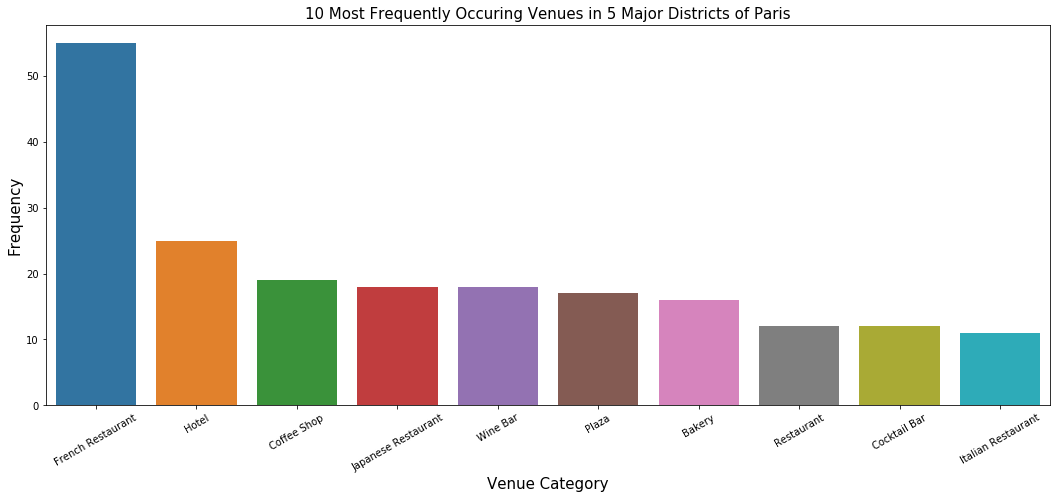

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Paris_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Paris', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()


In [23]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Paris_5_Dist_Venues_onehot = pd.get_dummies(Paris_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Paris_5_Dist_Venues_onehot['District'] = Paris_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Paris_5_Dist_Venues_onehot.columns[-1]] + list(Paris_5_Dist_Venues_onehot.columns[:-1])
Paris_Dist_Venues_onehot = Paris_5_Dist_Venues_onehot[fixed_columns]
Paris_5_Dist_Venues_onehot.head(3)


,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Bridge,Bubble Tea Shop,Burger Joint,Café,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,...,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Peruvian Restaurant,Pizza Place,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Trattoria/Osteria,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,District
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Louvre
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Louvre
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Louvre


In [24]:
Paris_5_Dist_Venues_Grouped = Paris_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Paris_5_Dist_Venues_Grouped.index = np.arange(1, len(Paris_5_Dist_Venues_Grouped)+1)
Paris_5_Dist_Venues_Grouped


,District,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Bridge,Bubble Tea Shop,Burger Joint,Café,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,...,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Peruvian Restaurant,Pizza Place,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Trattoria/Osteria,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
1,Bourse,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.04,0.02,0.01,0.01,0.03,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.04,0.03,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.01,0.00,0.00,...,0.00,0.01,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.06,0.01,0.02
2,Hôtel-de-Ville,0.01,0.00,0.00,0.00,0.04,0.02,0.00,0.00,0.01,0.01,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.01,0.03,0.00,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.01,0.01,...,0.00,0.02,0.02,0.01,0.00,0.00,0.00,0.05,0.01,0.01,0.00,0.03,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00
3,Louvre,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.03,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.03,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.03,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.07,0.00,0.00,0.02,0.03,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.03,0.01,0.00,0.00,0.03,0.00,0.00,0.04,0.01,0.01
4,Panthéon,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.04,0.04,0.00,0.01,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.03,0.00,0.01,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.04,0.01,0.04,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.01,0.00
5,Temple,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.01,0.04,0.02,0.00,0.03,0.02,0.00,0.00,0.03,0.00,0.01,0.02,0.02,0.01,0.00,0.02,0.01,0.01,0.00,0.02,0.03,0.07,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.02,0.04,0.01,0.00


In [25]:
num_top_venues = 5

for places in Paris_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Paris_5_Dist_Venues_Grouped[Paris_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


%%%%%%%%%Bourse%%%%%%%%
                 Venue  Freq
0    French Restaurant  0.11
1  Japanese Restaurant  0.07
2             Wine Bar  0.06
3                Hotel  0.05
4               Bakery  0.04


%%%%%%%%%Hôtel-de-Ville%%%%%%%%
               Venue  Freq
0  French Restaurant  0.12
1     Ice Cream Shop  0.05
2              Plaza  0.05
3        Art Gallery  0.04
4         Restaurant  0.03


%%%%%%%%%Louvre%%%%%%%%
                 Venue  Freq
0    French Restaurant  0.10
1                Hotel  0.09
2                Plaza  0.07
3  Japanese Restaurant  0.06
4             Wine Bar  0.04


%%%%%%%%%Panthéon%%%%%%%%
               Venue  Freq
0  French Restaurant  0.16
1              Hotel  0.06
2              Plaza  0.04
3             Bakery  0.04
4                Bar  0.04


%%%%%%%%%Temple%%%%%%%%
               Venue  Freq
0        Coffee Shop  0.07
1  French Restaurant  0.06
2              Hotel  0.05
3           Wine Bar  0.04
4             Bakery  0.04




In [26]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Paris_5_Dist_Venues_Grouped['District']

for ind in np.arange(Paris_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bourse,French Restaurant,Japanese Restaurant,Wine Bar,Hotel,Cocktail Bar,Bakery,Bookstore,Restaurant,Coffee Shop,Women's Store
2,Hôtel-de-Ville,French Restaurant,Plaza,Ice Cream Shop,Art Gallery,Historic Site,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,Park
3,Louvre,French Restaurant,Hotel,Plaza,Japanese Restaurant,Wine Bar,Bakery,Restaurant,Cocktail Bar,Coffee Shop,Italian Restaurant
4,Panthéon,French Restaurant,Hotel,Bar,Pub,Plaza,Bakery,Coffee Shop,Creperie,Indie Movie Theater,Ice Cream Shop
5,Temple,Coffee Shop,French Restaurant,Hotel,Italian Restaurant,Bakery,Wine Bar,Cocktail Bar,Restaurant,Sandwich Place,Breakfast Spot


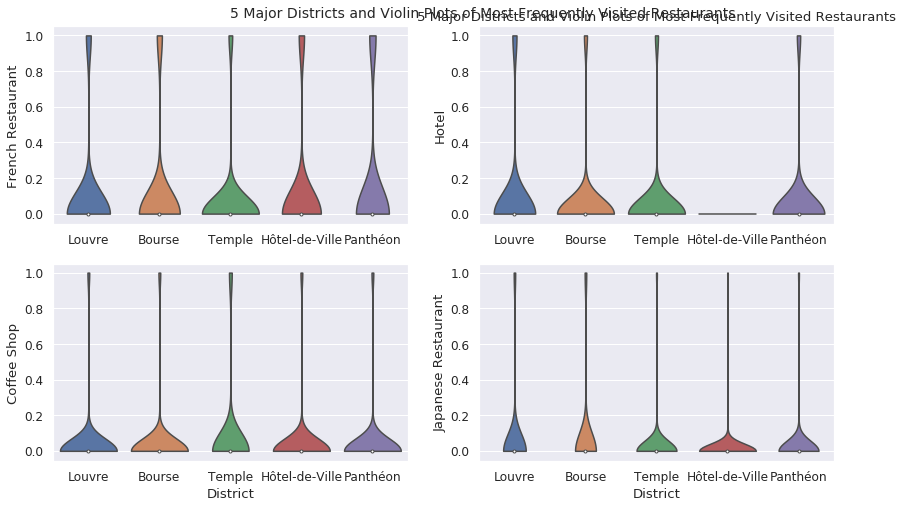

In [27]:
# Let's try Categorical plot 


fig = plt.figure(figsize=(14,8))



sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="District", y="French Restaurant", data=Paris_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="District", y="Hotel", data=Paris_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="District", y="Coffee Shop", data=Paris_5_Dist_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="District", y="Japanese Restaurant", data=Paris_5_Dist_Venues_onehot, cut=0);
ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Restaurants', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()


[34, 27, 31, 36, 25]


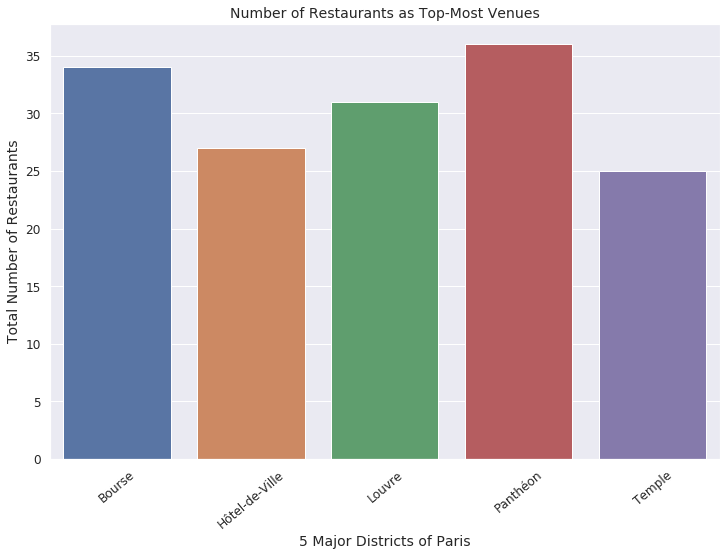

In [28]:
#try groupby to play with restaurant 
Paris_5_Dist_Venues_restaurant = Paris_5_Dist_Venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Paris_5_Dist_Venues_restaurant_df = Paris_5_Dist_Venues_restaurant.to_frame().reset_index()
Paris_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant']
#Paris_5_Dist_Venues_restaurant.columns = ['District', 'Number of Restaurant']
#print (type(Paris_5_Dist_Venues_restaurant))
Paris_5_Dist_Venues_restaurant_df.index = np.arange(1, len(Paris_5_Dist_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Paris_5_Dist_Venues_restaurant_df.shape)
#print (Paris_5_Dist_Venues_restaurant_df.head(5))
#print (type(Paris_5_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Paris_5_Dist_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=Paris_5_Dist_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("5 Major Districts of Paris", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()


# **Clustering**

In [29]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

Paris_grouped_clustering = Paris_5_Dist_Venues_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])


Check the 5 Cluster labels : [2 1 2 1 0]


In [30]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Paris_5_Dist_Coordinate_Cluster_merged = paris_df_5

#merge the inital Paris Dataframe with Sorted Most Visited places for each neighborhood

Paris_5_Dist_Coordinate_Cluster_merged = Paris_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Nom')

Paris_5_Dist_Coordinate_Cluster_merged
#______________________________________________________________

,Nom,Superficie(ha),Population,Densité1 (hab./km²),Latitude,Longitude,Prix du m²,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,183,16 545,9 041,48.861147,2.338028,10 000 €/m2,2,French Restaurant,Hotel,Plaza,Japanese Restaurant,Wine Bar,Bakery,Restaurant,Cocktail Bar,Coffee Shop,Italian Restaurant
1,Bourse,99,20 796,21 006,48.868630,2.341474,9 750 €/m2,2,French Restaurant,Japanese Restaurant,Wine Bar,Hotel,Cocktail Bar,Bakery,Bookstore,Restaurant,Coffee Shop,Women's Store
2,Temple,117,35 049,29 956,48.865900,2.361100,11 310 €/m2,0,Coffee Shop,French Restaurant,Hotel,Italian Restaurant,Bakery,Wine Bar,Cocktail Bar,Restaurant,Sandwich Place,Breakfast Spot
3,Hôtel-de-Ville,160,27 146,16 966,48.856500,2.352400,11 380 €/m2,1,French Restaurant,Plaza,Ice Cream Shop,Art Gallery,Historic Site,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,Park
4,Panthéon,254,59 333,23 359,48.846200,2.346400,11 890 €/m2,1,French Restaurant,Hotel,Bar,Pub,Plaza,Bakery,Coffee Shop,Creperie,Indie Movie Theater,Ice Cream Shop


In [31]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[Paris_latitude, Paris_longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_5_Dist_Coordinate_Cluster_merged['Latitude'], 
                                  Paris_5_Dist_Coordinate_Cluster_merged['Longitude'], 
                                  Paris_5_Dist_Coordinate_Cluster_merged['Nom'], 
                                  Paris_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [32]:
# create map
map_restaurants10 = folium.Map(location=[Paris_latitude, Paris_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>",
                               zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Louvre', 'Bourse', 'Temple', 'Hôtel-de-Ville', 'Panthéon']

# add markers to the map
for lat, lon, poi, cluster in zip(Paris_5_Dist_Coordinate_Cluster_merged['Latitude'], 
                                  Paris_5_Dist_Coordinate_Cluster_merged['Longitude'], 
                                  Paris_5_Dist_Coordinate_Cluster_merged['Nom'], 
                                  Paris_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10


In [33]:
Paris_Cluster1 = Paris_5_Dist_Coordinate_Cluster_merged.loc[Paris_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Paris_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Paris_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Paris_Cluster1.shape[0]))
Paris_Cluster1


No of Neighbourhood in Cluster Label 0: 1


,Densité1 (hab./km²),Latitude,Longitude,Prix du m²,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,29 956,48.8659,2.3611,11 310 €/m2,0,Coffee Shop,French Restaurant,Hotel,Italian Restaurant,Bakery,Wine Bar,Cocktail Bar,Restaurant,Sandwich Place,Breakfast Spot


In [34]:
Paris_Cluster2 = Paris_5_Dist_Coordinate_Cluster_merged.loc[Paris_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Paris_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Paris_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Paris_Cluster2.shape[0]))
Paris_Cluster2


No of Neighbourhood in Cluster Label 1: 2


,Densité1 (hab./km²),Latitude,Longitude,Prix du m²,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,16 966,48.8565,2.3524,11 380 €/m2,1,French Restaurant,Plaza,Ice Cream Shop,Art Gallery,Historic Site,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,Park
4,23 359,48.8462,2.3464,11 890 €/m2,1,French Restaurant,Hotel,Bar,Pub,Plaza,Bakery,Coffee Shop,Creperie,Indie Movie Theater,Ice Cream Shop


In [35]:
Paris_Cluster3 = Paris_5_Dist_Coordinate_Cluster_merged.loc[Paris_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Paris_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Paris_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Paris_Cluster3.shape[0]))
Paris_Cluster3




No of Neighbourhood in Cluster Label 2: 2


,Densité1 (hab./km²),Latitude,Longitude,Prix du m²,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9 041,48.861147,2.338028,10 000 €/m2,2,French Restaurant,Hotel,Plaza,Japanese Restaurant,Wine Bar,Bakery,Restaurant,Cocktail Bar,Coffee Shop,Italian Restaurant
1,21 006,48.868630,2.341474,9 750 €/m2,2,French Restaurant,Japanese Restaurant,Wine Bar,Hotel,Cocktail Bar,Bakery,Bookstore,Restaurant,Coffee Shop,Women's Store
